In [69]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mailtestcsv/MAIL_test.csv
/kaggle/input/mailcsv/MAIL.csv


In [70]:
import pandas as pd
import numpy as np

In [71]:
df = pd.read_csv('/kaggle/input/mailcsv/MAIL.csv',header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0,-1.0,-1.00,-1.000000,-1.0,-1.00000,-1.000000,-1.0,-1.0,-1.000000,...,-1.0,-1.0,-0.148221,-1.000000,-1.000000,-1.000000,-0.754045,-1.000000,-0.718446,-1.0
1,0,-1.0,-1.00,-1.000000,-1.0,-0.82691,-0.632182,-1.0,-1.0,-0.720307,...,-1.0,-1.0,-0.554151,-1.000000,-0.936759,-0.640316,-1.000000,-0.312254,-1.000000,-1.0
2,0,-1.0,-0.84,-0.820690,-1.0,-1.00000,-1.000000,-1.0,-1.0,-0.635001,...,-1.0,-1.0,-0.608332,-0.916667,-1.000000,-0.763021,-1.000000,-1.000000,-1.000000,-1.0
3,0,-1.0,-1.00,-0.886152,-1.0,-1.00000,-0.796825,-1.0,-1.0,-1.000000,...,-1.0,-1.0,-0.387624,-1.000000,-0.895765,-0.703583,-1.000000,-0.811075,-0.716612,-1.0
4,0,-1.0,-1.00,-0.774452,-1.0,-1.00000,-0.798742,-1.0,-1.0,-1.000000,...,-1.0,-1.0,-1.000000,-0.894040,-0.894040,-1.000000,-0.496689,-1.000000,-1.000000,-1.0


In [72]:
df.isnull().sum(axis=0)

0      0
1      0
2      0
3      0
4      0
      ..
396    0
397    0
398    0
399    0
400    0
Length: 401, dtype: int64

In [73]:
df_clean = df

In [74]:
df_clean.shape

(3587, 401)

In [75]:
y = df_clean[0].values
X = df_clean.drop([0],axis = 1).values

In [76]:
X = np.array(X)
y = np.array(y)

In [77]:
allclass = np.unique(y)
allclassnumber = [sum(y==eachclass) for eachclass in allclass]
allclassnumber

[1204, 2383]

In [78]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1)
X_res, y_res = sm.fit_resample(X, y)

allclass = np.unique(y_res)
allclassnumber = [sum(y_res==eachclass) for eachclass in allclass]
allclassnumber

[2383, 2383]

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=1)

In [80]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
X_train_norm =  scaler.transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

In [82]:
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import chi2
fs = GenericUnivariateSelect(chi2, mode='k_best', param=350)
fs.fit(X_train_norm,y_train)
X_train_norm = fs.transform(X_train_norm)
X_val_norm = fs.transform(X_val_norm)
X_test_norm = fs.transform(X_test_norm)

In [83]:
from sklearn.decomposition import PCA
fr = PCA(n_components=350)
fr.fit(X_train_norm)
X_train_norm = fr.transform(X_train_norm)
X_val_norm = fr.transform(X_val_norm)
X_test_norm = fr.transform(X_test_norm)


In [84]:
import tensorflow as tf

In [85]:
tf.compat.v1.reset_default_graph() # Clear Model
np.random.seed(1) # Fix Randomness
tf.compat.v1.random.set_random_seed(1) # Fix Randomness
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=(350,)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(2, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')    
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                22464     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 3

In [86]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [87]:
train_acc = list()
val_acc = list()
for i in range(0,500):
  history = model.fit(X_train_norm, y_train, epochs= 1, batch_size = 200, validation_data= (X_val_norm, y_val))
  tmp_avg = np.mean(history.history['accuracy'])
  tmp_avg_val = np.mean(history.history['val_accuracy'])
  train_acc.append(tmp_avg)
  val_acc.append(tmp_avg_val)

16/16 [==============================] - 0s 5ms/step - loss: 0.1771 - accuracy: 0.9839 - val_loss: 0.7522 - val_accuracy: 0.8532


16/16 [==============================] - 0s 7ms/step - loss: 0.1107 - accuracy: 0.9859 - val_loss: 0.8322 - val_accuracy: 0.8362


16/16 [==============================] - 0s 5ms/step - loss: 0.0845 - accuracy: 0.9852 - val_loss: 0.8456 - val_accuracy: 0.8139


16/16 [==============================] - 0s 5ms/step - loss: 0.0650 - accuracy: 0.9882 - val_loss: 1.0062 - val_accuracy: 0.8309


16/16 [==============================] - 0s 5ms/step - loss: 0.0592 - accuracy: 0.9882 - val_loss: 1.0723 - val_accuracy: 0.8322


16/16 [==============================] - 0s 5ms/step - loss: 0.0568 - accuracy: 0.9882 - val_loss: 1.1399 - val_accuracy: 0.8270


16/16 [==============================] - 0s 5ms/step - loss: 0.0561 - accuracy: 0.9882 - val_loss: 1.1751 - val_accuracy: 0.8296


16/16 [==============================] - 0s 6ms/step - loss: 0.0560 - accuracy: 0.9882 - val_loss: 1.2204 - val_accuracy: 0.8296


In [88]:
history.history

{'loss': [0.05596419423818588],
 'accuracy': [0.9881928563117981],
 'val_loss': [1.2204289436340332],
 'val_accuracy': [0.8296199440956116]}

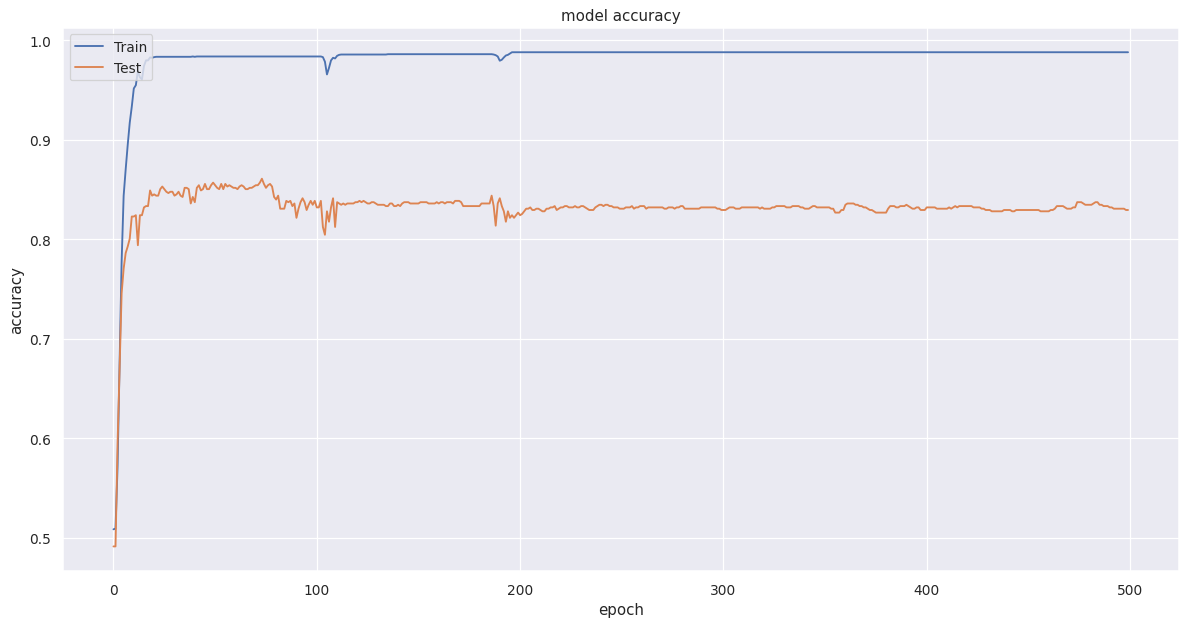

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(num=None, figsize=(16, 8), dpi=90, facecolor='w', edgecolor='k')
plt.plot()
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

test

In [90]:
y_predict = np.round(model.predict(X_test_norm))
y_predict = [i[0] for i in y_predict.tolist()]
sum(y_predict == y_test)/len(y_test)

0.8280922431865828

In [91]:
df_test = pd.read_csv('/kaggle/input/mailtestcsv/MAIL_test.csv',header = None)

In [92]:
yt = df_test[0].values
Xt = df_test.drop([0],axis = 1).values

In [93]:
X_test = scaler.transform(Xt)
X_test_n = fs.transform(X_test)
X_test_n = fr.transform(X_test_n)

In [94]:
y_predict = np.round(model.predict(X_test_n))
y_predict = [i[0] for i in y_predict.tolist()]
sum(y_predict == yt)/len(yt)

0.7404409712531398